<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9040-CDNA-20203/blob/main/projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

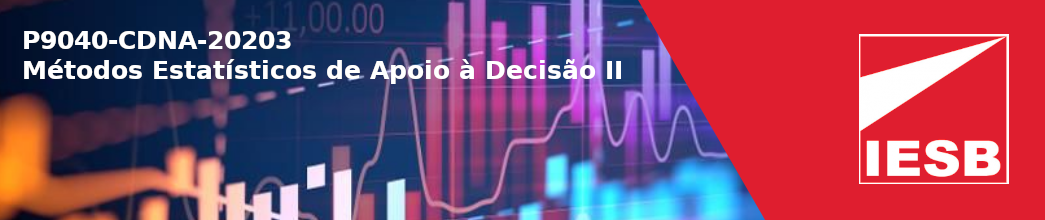

# Regressão logística multinomial
* Quando se tem uma saída categórica que não é ordinal
* Funciona de forma semelhante à regressão logística binomial
* Similar a uma regressão binomial com variáveis ​​de saída codificadas fictícias

# Conjuntos de dados de qualidade do vinho

Esses conjuntos de dados estão disponíveis ao público apenas para fins de pesquisa. Os detalhes estão descritos em [Cortez et al., 2009]: [© Elsevier] [Pré-impressão (pdf)] [bib]. Inclua esta citação se você planeja usar estes conjuntos de dados:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos e J. Reis. Modelagem de preferências de vinho por mineração de dados de propriedades físico-químicas. In Decision Support Systems, Elsevier, 47 (4): 547-553, 2009.

Os dados podem ser usados ​​para testar métodos de regressão (ordinal) ou classificação (especificamente, esta é uma tarefa multiclasse, onde as classes são ordenadas). Outras questões de pesquisa são seleção de recursos e detecção de outliers. Os dados incluem dois conjuntos de dados:

* winequality-red.csv - amostras de preferência de vinho tinto
* winequality-white.csv - amostras de preferência de vinho branco

Os conjuntos de dados estão disponíveis aqui: [winequality.zip](http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip)

O vinho verde é um produto único da região do Minho (noroeste) de Portugal. 

Médio em álcool, é particularmente apreciado pela sua frescura (principalmente no verão).

Mais detalhes podem ser encontrados em: http://www.vinhoverde.pt/en/

## Utilizando R nativo no Google Colab

[Clique aqui!](https://colab.research.google.com/notebook#create=true&language=r)

## Verificando versão do R

In [15]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           

## Instalando bibliotecas

In [265]:
install.packages("tidyverse")
install.packages('inspectdf')
install.packages('GGally')
install.packages('caret')
install.packages('car')
install.packages('carData')
install.packages('Hmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importando bibliotecas

In [ ]:
http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip

In [250]:
library(ggplot2) # para gráficos
library(inspectdf) # para inspecionar a proporção de variávei categoricas
library(GGally) # para inspecionar correlação entre variáveis
library(caret) # para realizar validação-cruzada
library(class) # pacote knn
library(car) # para inspecionar multicolinearidade
library(Hmisc) # para geração de histogramas
library(tidyverse)

## Carregando os dados

O conjunto de dados de vinhos foi obtido do UCI Machine Learning Repository, contendo as características físico-químicas das variantes tinto e branco do “Vinho Verde” português.

In [253]:
white <- read.csv("/content/sample_data/winequality-white.csv", sep=';')
white

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


### Descrição das colunas:

* acidez fixa: a maioria dos ácidos envolvidos com o vinho
* acidez volátil: quantidade de ácido acético no vinho
* ácido cítrico: encontrado em pequenas quantidades
* açúcar residual: quantidade de açúcar remanescente após a fermentação / produção do vinho
* cloretos: quantidade de sal no vinho
* dióxido de enxofre livre: formas livres de S02, evita o crescimento microbiano e a oxidação do vinho
* dióxido de enxofre total: quantidade de formas livres e ligadas de S02
* densidade: a densidade da água dependendo do teor de álcool e açúcar
* pH: descreve o quão ácido ou básico um vinho é em uma escala de 0-14 (muito * ácido: 0, muito básico: 14); a maioria dos vinhos está entre 3-4 na escala de pH
* sulfatos: um antimicrobiano e antioxidante
* álcool: o teor de álcool percentual do vinho
* qualidade: variável de destino (com base em dados sensoriais, pontuação entre 0 e 10)

## Preparando os dados

Criação de um modelo para prever a qualidade do vinho branco.

In [255]:
white <- white %>%
mutate(quality = as.factor(ifelse(quality > 6, "Excellent", "Poor-Normal")))
white


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,Poor-Normal
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,Poor-Normal
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,Poor-Normal
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,Poor-Normal
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,Poor-Normal
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,Poor-Normal
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,Poor-Normal
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,Poor-Normal
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,Poor-Normal


In [241]:
# inspecionando valores ausentes
round(prop.table(table(is.na(white))),3)


FALSE 
    1 

In [242]:
data.frame(cbind(missing = colSums(is.na(white)), 
      prop = round(prop.table(colSums(is.na(white))),2)))

,missing,prop
,<dbl>,<dbl>
fixed.acidity,0,NaN
volatile.acidity,0,NaN
citric.acid,0,NaN
residual.sugar,0,NaN
chlorides,0,NaN
free.sulfur.dioxide,0,NaN
total.sulfur.dioxide,0,NaN
density,0,NaN
pH,0,NaN


In [243]:
# inspecionando a distribuição de dados de variáveis numéricas
inspect_num(white[,-c(6:8,10:11)])

col_name,min,q1,median,mean,q3,max,sd,pcnt_na,hist
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<named list>
fixed.acidity,3.800,6.300,6.800,6.85478767,7.30,14.200,0.84386823,0,"[-Inf, 3.5) , [3.5, 4) , [4, 4.5) , [4.5, 5) , [5, 5.5) , [5.5, 6) , [6, 6.5) , [6.5, 7) , [7, 7.5) , [7.5, 8) , [8, 8.5) , [8.5, 9) , [9, 9.5) , [9.5, 10) , [10, 10.5) , [10.5, 11) , [11, 11.5) , [11.5, 12) , [12, 12.5) , [12.5, 13) , [13, 13.5) , [13.5, 14) , [14, 14.5) , [14.5, Inf) , 0 , 0.000408329930583912, 0.00102082482645978 , 0.00469579420171499 , 0.0265414454879543 , 0.0845242956308697 , 0.20457329522254 , 0.265414454879543 , 0.206614944875459 , 0.109432421396488 , 0.0569620253164557 , 0.0216414863209473 , 0.0118415679869334 , 0.00428746427113107 , 0.00122498979175174 , 0.000408329930583912, 0 , 0.000204164965291956, 0 , 0 , 0 , 0 , 0.000204164965291956, 0"
volatile.acidity,0.080,0.210,0.260,0.27824112,0.32,1.100,0.10079455,0,"[-Inf, 0.05) , [0.05, 0.1) , [0.1, 0.15) , [0.15, 0.2) , [0.2, 0.25) , [0.25, 0.3) , [0.3, 0.35) , [0.35, 0.4) , [0.4, 0.45) , [0.45, 0.5) , [0.5, 0.55) , [0.55, 0.6) , [0.6, 0.65) , [0.65, 0.7) , [0.7, 0.75) , [0.75, 0.8) , [0.8, 0.85) , [0.85, 0.9) , [0.9, 0.95) , [0.95, 1) , [1, 1.05) , [1.05, 1.1) , [1.1, Inf) , 0 , 0.00122498979175174 , 0.0347080440996325 , 0.148836259697836 , 0.228664761126991 , 0.232339730502246 , 0.16802776643528 , 0.0792160065332789 , 0.0496120865659453 , 0.0226623111474071 , 0.0108207431604737 , 0.00898325847284606 , 0.00653327888934259 , 0.00469579420171499 , 0.00102082482645978 , 0.00102082482645978 , 0.000204164965291956, 0.000204164965291956, 0.000612494895875868, 0.000204164965291956, 0.000204164965291956, 0.000204164965291956, 0"
citric.acid,0.000,0.270,0.320,0.33419151,0.39,1.660,0.12101980,0,"[-Inf, 0) , [0, 0.1) , [0.1, 0.2) , [0.2, 0.3) , [0.3, 0.4) , [0.4, 0.5) , [0.5, 0.6) , [0.6, 0.7) , [0.7, 0.8) , [0.8, 0.9) , [0.9, 1) , [1, 1.1) , [1.1, 1.2) , [1.2, 1.3) , [1.3, 1.4) , [1.4, 1.5) , [1.5, 1.6) , [1.6, 1.7) , [1.7, Inf) , 0 , 0.0173540220498163 , 0.0526745610453246 , 0.32258064516129 , 0.376276031033075 , 0.159861167823601 , 0.0389955083707636 , 0.0149040424663128 , 0.013679052674561 , 0.00163331972233565 , 0.000612494895875868, 0.00102082482645978 , 0 , 0.000204164965291956, 0 , 0 , 0 , 0.000204164965291956, 0"
residual.sugar,0.600,1.700,5.200,6.39141486,9.90,65.800,5.07205778,0,"[-Inf, 0) , [0, 5) , [5, 10) , [10, 15) , [15, 20) , [20, 25) , [25, 30) , [30, 35) , [35, 40) , [40, 45) , [45, 50) , [50, 55) , [55, 60) , [60, 65) , [65, 70) , [70, Inf) , 0 , 0.48325847284606 , 0.269497754185382 , 0.179052674561045 , 0.0645161290322581 , 0.00265414454879543 , 0.000408329930583912, 0.000408329930583912, 0 , 0 , 0 , 0 , 0 , 0 , 0.000204164965291956, 0"
chlorides,0.009,0.036,0.043,0.04577236,0.05,0.346,0.02184797,0,"[-Inf, 0) , [0, 0.02) , [0.02, 0.04) , [0.04, 0.06) , [0.06, 0.08) , [0.08, 0.1) , [0.1, 0.12) , [0.12, 0.14) , [0.14, 0.16) , [0.16, 0.18) , [0.18, 0.2) , [0.2, 0.22) , [0.22, 0.24) , [0.24, 0.26) , [0.26, 0.28) , [0.28, 0.3) , [0.3, 0.32) , [0.32, 0.34) , [0.34, 0.36) , [0.36, Inf) , 0 , 0.00816659861167824 , 0.375867701102491 , 0.532462229481421 , 0.0492037566353614 , 0.0118415679869334 , 0.00367496937525521 , 0.00449162923642303 , 0.00408329930583912 , 0.00469579420171499 , 0.0018374846876276 , 0.00204164965291956 , 0.000204164965291956, 0.000612494895875868, 0.000204164965291956, 0.000204164965291956, 0.000204164965291956, 0 , 0.000204164965291956, 0"
pH,2.720,3.090,3.180,3.18826664,3.28,3.820,0.15100060,0,"[-Inf, 2.7) , [2.7, 2.75) , [2.75, 2.8) , [2.8, 2.85) , [2.85, 2.9) , [2.9, 2.95) , [2.95, 3) , [3, 3.05) , [3.05, 3.1) , [3.1, 3.15) , [3.15, 3.2) , [3.2, 3.25) , [3.25, 3.3) , [3.3, 3.35) , [3.35, 3.4) , [3.4, 3.45) , [3.45, 3.5) , [3.5, 3.55) , [3.55, 3.6) , [3.6, 3.65) , [3.65, 3.7) , [3.7, 3.75) , [3.75, 3.8) , [3.8, 3.85) , [3.85, Inf) , 0 , 0.000408329930583912, 0.000816659861167824, 0.0018374846876276 , 0.0112290730910576 , 0.027970600244998 , 0.046

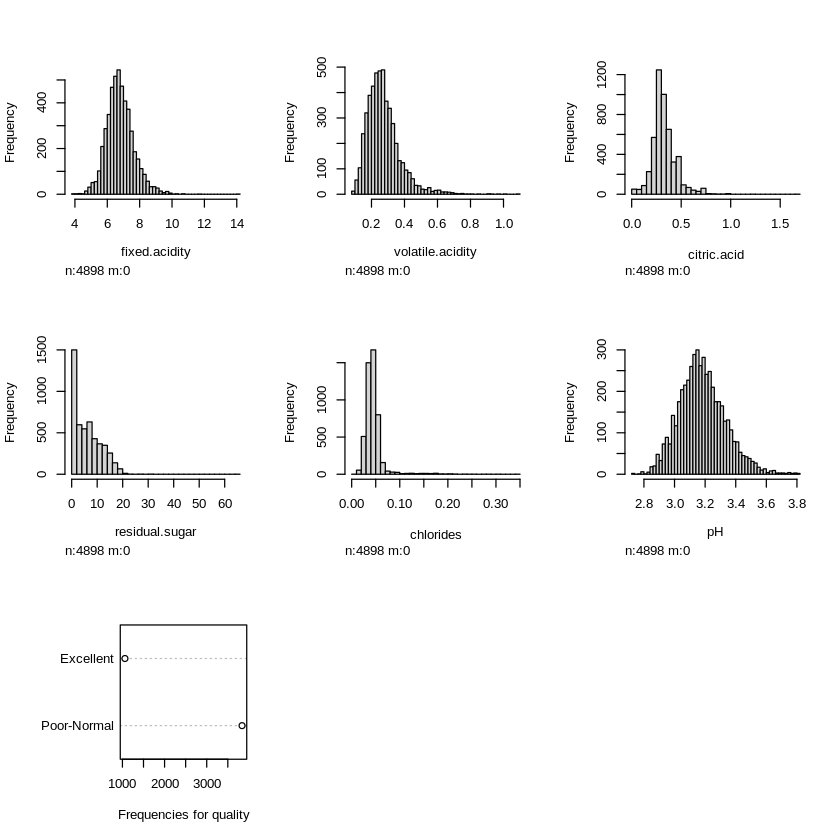

In [244]:
hist(white[,-c(6:8,10:11)])

Em caso de dados ausentes, pode-se fazer inputação pela média. Os dados não são normalmente distribuídos.

In [210]:
# inputando por média em NA
prevalues <- preProcess(wine, method=c("medianImpute"))
white <- predict(prevalues, white)
colSums(is.na(white))

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

## Análise Exploratória dos Dados

In [256]:
white %>% inspect_types()

type,cnt,pcnt,col_name
<chr>,<int>,<dbl>,<named list>
numeric,11,91.666667,"fixed.acidity , volatile.acidity , citric.acid , residual.sugar , chlorides , free.sulfur.dioxide , total.sulfur.dioxide, density , pH , sulphates , alcohol"
factor,1,8.333333,quality


In [257]:
wine_cat <- white %>% inspect_cat()
wine_cat

col_name,cnt,common,common_pcnt,levels
<chr>,<int>,<chr>,<dbl>,<named list>
quality,2,Poor-Normal,78.35851,"Poor-Normal , Excellent , 0.783585136790527, 0.216414863209473, 3838 , 1060"


Com base nas informações acima, há uma proporção desequilibrada entre os níveis em nossa variável de destino. Para evitar a perda de variância, usaremos upsampling (em vez de downsampling) para equilibrar a proporção.

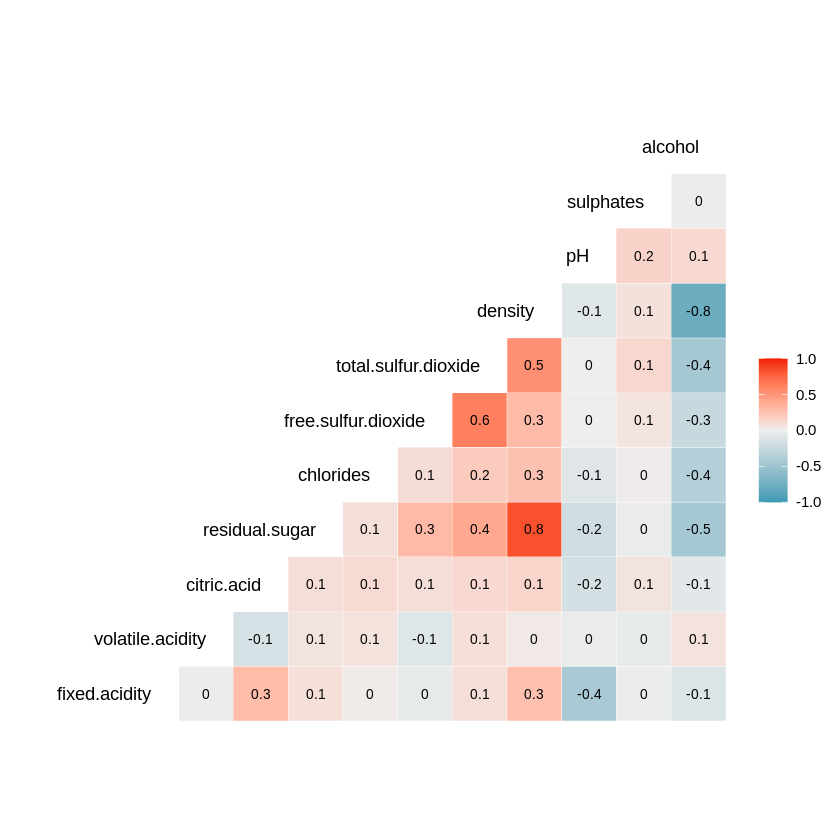

In [258]:
# inspecionando correlação entre preditores
GGally::ggcorr(white[,-12], hjust = 1, layout.exp = 2, label = T, label_size = 2.9)

Com base no gráfico acima, existem algumas variáveis ​​preditoras que possuem uma alta correlação umas com as outras. Essas variáveis ​​são dióxido de enxofre livre, dióxido de enxofre total, densidade, álcool e açúcar residual. Isso nos deu um aviso prévio de que esses dados podem não ser apropriados para algum modelo como Naive Bayes.

## Validação cruzada

In [263]:
library(tidyverse)

In [264]:
white_split <- initial_split(data = white, prop = 0.8, strata = "quality")

train <- training(white_split)
test <- testing(white_split)

ERROR: ignored